In [1]:
using Revise

In [2]:
using
    QuantumStates,
    OpticalBlochEquations,
    DifferentialEquations,
    UnitsToValue,
    LinearAlgebra
;

[ Info: Precompiling QuantumStates [17f0441f-15e0-42ae-a101-302633ff8f0f]


In [3]:
const λ = 1
const Γ = 2π
const m = 1
const k = 2π / λ
;

In [4]:
H_operator = :(
    T * L +
    B_z * Zeeman_L0
)
parameters = @params begin
    T = 1.0
    B_z = 0.5
end

# Create basis states
QN_bounds = (L = 0, N = 2)
ground_states = enumerate_states(AngularMomentumState_Labelled, QN_bounds)
QN_bounds = (L = 1, N = 1)
excited_states = enumerate_states(AngularMomentumState_Labelled, QN_bounds)

# Create Hamiltonian
basis = [ground_states; excited_states]
H = Hamiltonian(basis=basis, operator=H_operator, parameters=parameters)

#
TDM_x1(state, state′) = sum(arg * TDM(state, state′, q-2) + conj(arg * TDM(state′, state, q-2)) for (q,arg) ∈ enumerate(rotate_pol(σ⁺, +x̂)))
TDM_x2(state, state′) = sum(arg * TDM(state, state′, q-2) + conj(arg * TDM(state′, state, q-2)) for (q,arg) ∈ enumerate(rotate_pol(σ⁺, -x̂)))
TDM_y1(state, state′) = sum(arg * TDM(state, state′, q-2) + conj(arg * TDM(state′, state, q-2)) for (q,arg) ∈ enumerate(rotate_pol(σ⁺, +ŷ)))
TDM_y2(state, state′) = sum(arg * TDM(state, state′, q-2) + conj(arg * TDM(state′, state, q-2)) for (q,arg) ∈ enumerate(rotate_pol(σ⁺, -ŷ)))
# H = add_to_H(H, :s, TDM_x1 + TDM_x2 + TDM_y1 + TDM_y2)
TDM_σ0(state, state′) = TDM(state, state′, 0) + conj(TDM(state′, state, 0))
H = add_to_H(H, :s, TDM_σ0)
H.parameters.s = 2.0

evaluate!(H)
QuantumStates.solve!(H)

update_basis_tdms!(H)
update_tdms!(H)
d = H.tdms

d[1:5, 6:end, 1] ./= sqrt(sum(d[1:5, 6:end, 1].^2))
d[6:end, 1:5, 1] ./= sqrt(sum(d[6:end, 1:5, 1].^2))
d[1:5, 6:end, 2] ./= sqrt(sum(d[1:5, 6:end, 2].^2))
d[6:end, 1:5, 2] ./= sqrt(sum(d[6:end, 1:5, 2].^2))
d[1:5, 6:end, 3] ./= sqrt(sum(d[1:5, 6:end, 3].^2))
d[6:end, 1:5, 3] ./= sqrt(sum(d[6:end, 1:5, 3].^2))
d[1:5,1:5,:] .= 0.0
d[6:8,6:8,:] .= 0.0
;

In [5]:
H.states[1] |> display
H.states[2] |> display
H.states[3] |> display
H.states[4] |> display
H.states[5] |> display
H.states[6] |> display
H.states[7] |> display
H.states[8] |> display

State{AngularMomentumState_Labelled}(-1.077591804735174, AngularMomentumState_Labelled[AngularMomentumState_Labelled(0.0, 0, 2, -2, (M = -2:2,)), AngularMomentumState_Labelled(0.0, 0, 2, -1, (M = -2:2,)), AngularMomentumState_Labelled(0.0, 0, 2, 0, (M = -2:2,)), AngularMomentumState_Labelled(0.0, 0, 2, 1, (M = -2:2,)), AngularMomentumState_Labelled(0.0, 0, 2, 2, (M = -2:2,)), AngularMomentumState_Labelled(0.0, 1, 1, -1, (M = -1:1,)), AngularMomentumState_Labelled(0.0, 1, 1, 0, (M = -1:1,)), AngularMomentumState_Labelled(0.0, 1, 1, 1, (M = -1:1,))], ComplexF64[0.0 + 0.0im, 0.8845712754962237 + 0.0im, 0.0 + 0.0im, 0.0 + 0.0im, 0.0 + 0.0im, -0.4664050370300301 + 0.0im, 0.0 + 0.0im, 0.0 + 0.0im], 1)

State{AngularMomentumState_Labelled}(-0.9999999999999997, AngularMomentumState_Labelled[AngularMomentumState_Labelled(0.0, 0, 2, -2, (M = -2:2,)), AngularMomentumState_Labelled(0.0, 0, 2, -1, (M = -2:2,)), AngularMomentumState_Labelled(0.0, 0, 2, 0, (M = -2:2,)), AngularMomentumState_Labelled(0.0, 0, 2, 1, (M = -2:2,)), AngularMomentumState_Labelled(0.0, 0, 2, 2, (M = -2:2,)), AngularMomentumState_Labelled(0.0, 1, 1, -1, (M = -1:1,)), AngularMomentumState_Labelled(0.0, 1, 1, 0, (M = -1:1,)), AngularMomentumState_Labelled(0.0, 1, 1, 1, (M = -1:1,))], ComplexF64[1.0 + 0.0im, 0.0 + 0.0im, 0.0 + 0.0im, 0.0 + 0.0im, 0.0 + 0.0im, 0.0 + 0.0im, 0.0 + 0.0im, 0.0 + 0.0im], 2)

State{AngularMomentumState_Labelled}(-0.8601470508735427, AngularMomentumState_Labelled[AngularMomentumState_Labelled(0.0, 0, 2, -2, (M = -2:2,)), AngularMomentumState_Labelled(0.0, 0, 2, -1, (M = -2:2,)), AngularMomentumState_Labelled(0.0, 0, 2, 0, (M = -2:2,)), AngularMomentumState_Labelled(0.0, 0, 2, 1, (M = -2:2,)), AngularMomentumState_Labelled(0.0, 0, 2, 2, (M = -2:2,)), AngularMomentumState_Labelled(0.0, 1, 1, -1, (M = -1:1,)), AngularMomentumState_Labelled(0.0, 1, 1, 0, (M = -1:1,)), AngularMomentumState_Labelled(0.0, 1, 1, 1, (M = -1:1,))], ComplexF64[0.0 + 0.0im, 0.0 + 0.0im, -0.8269242138935418 + 0.0im, 0.0 + 0.0im, 0.0 + 0.0im, 0.0 + 0.0im, 0.5623133863572409 + 0.0im, 0.0 + 0.0im], 3)

State{AngularMomentumState_Labelled}(-0.37361025271221027, AngularMomentumState_Labelled[AngularMomentumState_Labelled(0.0, 0, 2, -2, (M = -2:2,)), AngularMomentumState_Labelled(0.0, 0, 2, -1, (M = -2:2,)), AngularMomentumState_Labelled(0.0, 0, 2, 0, (M = -2:2,)), AngularMomentumState_Labelled(0.0, 0, 2, 1, (M = -2:2,)), AngularMomentumState_Labelled(0.0, 0, 2, 2, (M = -2:2,)), AngularMomentumState_Labelled(0.0, 1, 1, -1, (M = -1:1,)), AngularMomentumState_Labelled(0.0, 1, 1, 0, (M = -1:1,)), AngularMomentumState_Labelled(0.0, 1, 1, 1, (M = -1:1,))], ComplexF64[0.0 + 0.0im, 0.0 + 0.0im, 0.0 + 0.0im, -0.7818238547604547 + 0.0im, 0.0 + 0.0im, 0.0 + 0.0im, 0.0 + 0.0im, 0.6234993665814774 + 0.0im], 4)

State{AngularMomentumState_Labelled}(0.9999999999999997, AngularMomentumState_Labelled[AngularMomentumState_Labelled(0.0, 0, 2, -2, (M = -2:2,)), AngularMomentumState_Labelled(0.0, 0, 2, -1, (M = -2:2,)), AngularMomentumState_Labelled(0.0, 0, 2, 0, (M = -2:2,)), AngularMomentumState_Labelled(0.0, 0, 2, 1, (M = -2:2,)), AngularMomentumState_Labelled(0.0, 0, 2, 2, (M = -2:2,)), AngularMomentumState_Labelled(0.0, 1, 1, -1, (M = -1:1,)), AngularMomentumState_Labelled(0.0, 1, 1, 0, (M = -1:1,)), AngularMomentumState_Labelled(0.0, 1, 1, 1, (M = -1:1,))], ComplexF64[0.0 + 0.0im, 0.0 + 0.0im, 0.0 + 0.0im, 0.0 + 0.0im, -1.0 + 0.0im, 0.0 + 0.0im, 0.0 + 0.0im, 0.0 + 0.0im], 5)

State{AngularMomentumState_Labelled}(1.5775918047351751, AngularMomentumState_Labelled[AngularMomentumState_Labelled(0.0, 0, 2, -2, (M = -2:2,)), AngularMomentumState_Labelled(0.0, 0, 2, -1, (M = -2:2,)), AngularMomentumState_Labelled(0.0, 0, 2, 0, (M = -2:2,)), AngularMomentumState_Labelled(0.0, 0, 2, 1, (M = -2:2,)), AngularMomentumState_Labelled(0.0, 0, 2, 2, (M = -2:2,)), AngularMomentumState_Labelled(0.0, 1, 1, -1, (M = -1:1,)), AngularMomentumState_Labelled(0.0, 1, 1, 0, (M = -1:1,)), AngularMomentumState_Labelled(0.0, 1, 1, 1, (M = -1:1,))], ComplexF64[0.0 + 0.0im, -0.4664050370300301 + 0.0im, 0.0 + 0.0im, 0.0 + 0.0im, 0.0 + 0.0im, -0.8845712754962237 + 0.0im, 0.0 + 0.0im, 0.0 + 0.0im], 6)

State{AngularMomentumState_Labelled}(1.860147050873544, AngularMomentumState_Labelled[AngularMomentumState_Labelled(0.0, 0, 2, -2, (M = -2:2,)), AngularMomentumState_Labelled(0.0, 0, 2, -1, (M = -2:2,)), AngularMomentumState_Labelled(0.0, 0, 2, 0, (M = -2:2,)), AngularMomentumState_Labelled(0.0, 0, 2, 1, (M = -2:2,)), AngularMomentumState_Labelled(0.0, 0, 2, 2, (M = -2:2,)), AngularMomentumState_Labelled(0.0, 1, 1, -1, (M = -1:1,)), AngularMomentumState_Labelled(0.0, 1, 1, 0, (M = -1:1,)), AngularMomentumState_Labelled(0.0, 1, 1, 1, (M = -1:1,))], ComplexF64[0.0 + 0.0im, 0.0 + 0.0im, 0.5623133863572412 + 0.0im, 0.0 + 0.0im, 0.0 + 0.0im, 0.0 + 0.0im, 0.8269242138935418 + 0.0im, 0.0 + 0.0im], 7)

State{AngularMomentumState_Labelled}(1.8736102527122114, AngularMomentumState_Labelled[AngularMomentumState_Labelled(0.0, 0, 2, -2, (M = -2:2,)), AngularMomentumState_Labelled(0.0, 0, 2, -1, (M = -2:2,)), AngularMomentumState_Labelled(0.0, 0, 2, 0, (M = -2:2,)), AngularMomentumState_Labelled(0.0, 0, 2, 1, (M = -2:2,)), AngularMomentumState_Labelled(0.0, 0, 2, 2, (M = -2:2,)), AngularMomentumState_Labelled(0.0, 1, 1, -1, (M = -1:1,)), AngularMomentumState_Labelled(0.0, 1, 1, 0, (M = -1:1,)), AngularMomentumState_Labelled(0.0, 1, 1, 1, (M = -1:1,))], ComplexF64[0.0 + 0.0im, 0.0 + 0.0im, 0.0 + 0.0im, -0.6234993665814774 + 0.0im, 0.0 + 0.0im, 0.0 + 0.0im, 0.0 + 0.0im, -0.7818238547604546 - 0.0im], 8)

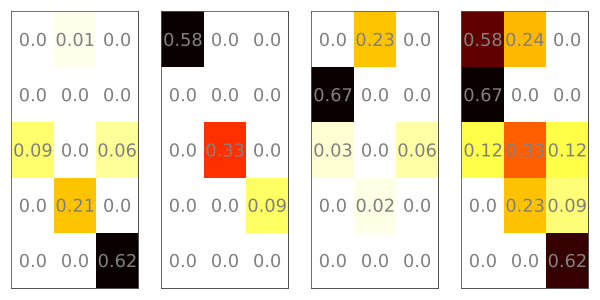

In [6]:
using Plots
tdms = d[1:5,6:8,:]
tdms_squared = norm.(d[1:5,6:8,:]).^2

plot(
    size=(600,300),
    box=:on,
    layout=(1,4)
    )
heatmap!(tdms_squared[:,:,1], c=cgrad(:hot, rev=true), legend=:none, yflip=true, subplot=1, ticks=nothing, colorbar=nothing)
heatmap!(tdms_squared[:,:,2], c=cgrad(:hot, rev=true), legend=:none, yflip=true, subplot=2, ticks=nothing, colorbar=nothing)
heatmap!(tdms_squared[:,:,3], c=cgrad(:hot, rev=true), legend=:none, yflip=true, subplot=3, ticks=nothing, colorbar=nothing)
heatmap!(sum(tdms_squared, dims=3)[:,:,1], c=cgrad(:hot, rev=true), legend=:none, yflip=true, subplot=4, ticks=nothing, colorbar=nothing)

nrow, ncol = size(tdms_squared[:,:,1])
ann = [(j,i, text(round(tdms_squared[i,j,1], digits=2), 12, :grey, :center)) for i in 1:nrow for j in 1:ncol]
annotate!(ann, linecolor=:white, subplot=1)

nrow, ncol = size(tdms[:,:,1])
ann = [(j,i, text(round(tdms_squared[i,j,2], digits=2), 12, :grey, :center)) for i in 1:nrow for j in 1:ncol]
annotate!(ann, linecolor=:white, subplot=2)

nrow, ncol = size(tdms[:,:,1])
ann = [(j,i, text(round(tdms_squared[i,j,3], digits=2), 12, :grey, :center)) for i in 1:nrow for j in 1:ncol]
annotate!(ann, linecolor=:white, subplot=3)

nrow, ncol = size(tdms[:,:,1])
ann = [(j,i, text(round(sum(tdms_squared, dims=3)[i,j,1], digits=2), 12, :grey, :center)) for i in 1:nrow for j in 1:ncol]
annotate!(ann, linecolor=:white, subplot=4)

In [7]:
tdms_squared[5,:,:]

3×3 Matrix{Float64}:
 0.0      0.0  0.0
 0.0      0.0  0.0
 0.62224  0.0  0.0

In [10]:
using StatsBase

n_ground = length(ground_states)
det_factor = [1+4*(energy(H.states[n_ground + j]) - energy(H.states[i]))^2 for i ∈ 1:length(ground_states), j ∈ 1:length(excited_states)].^(-1)


tdms_squared_det[:,:,1] = tdms_squared[:,:,1] .* det_factor
tdms_squared_det[:,:,2] = tdms_squared[:,:,2] .* det_factor
tdms_squared_det[:,:,3] = tdms_squared[:,:,3] .* det_factor

rates_i_wvs = [Weights(vec(tdms_squared_det[i,:,:])) for i ∈ 1:length(ground_states)]
rates_j_wvs = [Weights(vec(tdms_squared_det[:,j,:])) for j ∈ 1:length(excited_states)]
cart_indices_i = CartesianIndices(tdms_squared[1,:,:])
cart_indices_j = CartesianIndices(tdms_squared[:,1,:])

scatter_photon!(state, rates_i_wvs, cart_indices_i) = cart_indices_i[sample(rates_i_wvs[state])]
decay!(state, rates_j_wvs, cart_indices_j) = cart_indices_j[sample(rates_j_wvs[state])]

# n = 5000
# ground_state = 1
# trap_scatters = 0
# antitrap_scatters = 0
# states = zeros(n)
# @time for i ∈ 1:n
#     excited_state = scatter_photon!(ground_state, rates_i_wvs, cart_indices_i)
#     new_ground_state = decay!(excited_state[1], rates_j_wvs, cart_indices_j)
#     ground_state = new_ground_state[1]

#     if excited_state[2] == 1
#         trap_scatters += 1
#     elseif excited_state[2] == 3
#         antitrap_scatters += 1
#     end
#     states[i] = ground_state
# end
# trap_scatters |> display
# antitrap_scatters |> display

decay! (generic function with 1 method)

┌ Warning: G:\My Drive\github\UnitsToValue\src is not an existing directory, Revise is not watching
└ @ Revise C:\Users\halla\.julia\packages\Revise\Kw99o\src\packagedef.jl:574
┌ Warning: G:\My Drive\github\OpticalBlochEquations\src is not an existing directory, Revise is not watching
└ @ Revise C:\Users\halla\.julia\packages\Revise\Kw99o\src\packagedef.jl:574
┌ Warning: G:\My Drive\github\QuantumStates\src is not an existing directory, Revise is not watching
└ @ Revise C:\Users\halla\.julia\packages\Revise\Kw99o\src\packagedef.jl:574


In [13]:
n_trap = []
n_antitrap = []

@time for nn in 1:1:10000
    n = 5000
    ground_state = 1
    trap_scatters = 0
    antitrap_scatters = 0
    states = zeros(n)
    for i ∈ 1:n
        excited_state = scatter_photon!(ground_state, rates_i_wvs, cart_indices_i)
        new_ground_state = decay!(excited_state[1], rates_j_wvs, cart_indices_j)
        ground_state = new_ground_state[1]

        if excited_state[2] == 1
            trap_scatters += 1
        elseif excited_state[2] == 3
            antitrap_scatters += 1
        end
        states[i] = ground_state
    end
    push!(n_trap, trap_scatters)
    push!(n_antitrap, antitrap_scatters)
end

  6.193027 seconds (144.93 M allocations: 4.023 GiB, 5.78% gc time, 0.18% compilation time)


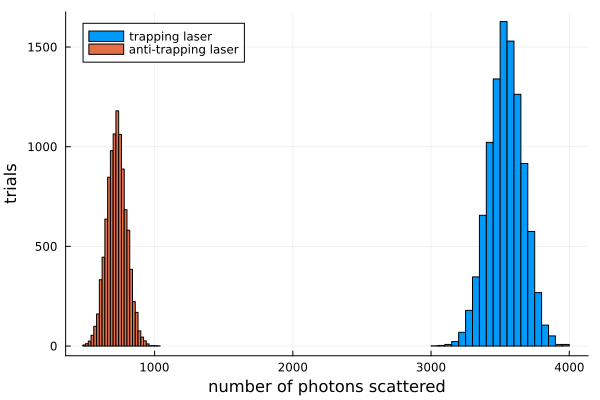

In [14]:
histogram(n_trap, label="trapping laser",bins=40)
histogram!(n_antitrap, label="anti-trapping laser",xlabel="number of photons scattered",ylabel="trials",bins=40)


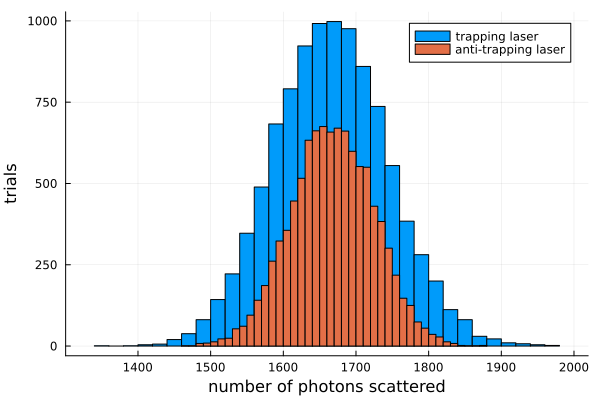

In [11]:
# without consering detuning due to stark shift
histogram(n_trap, label="trapping laser",bins=40)
histogram!(n_antitrap, label="anti-trapping laser",xlabel="number of photons scattered",ylabel="trials",bins=40)


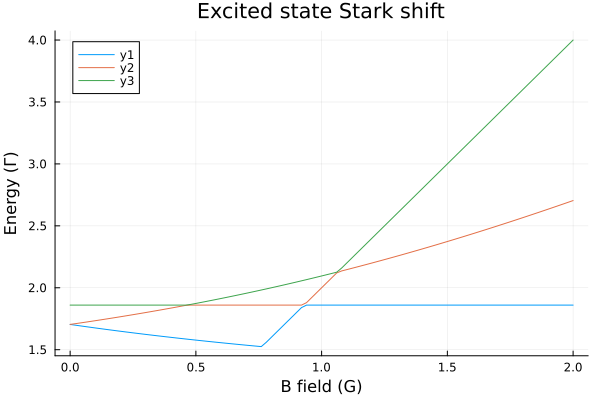

In [16]:
B_scan = collect(LinRange(0,2,101))
energies = zeros((length(B_scan),3))
    
for i in 1:1:length(B_scan)
    H.parameters.B_z = B_scan[i]
    evaluate!(H)
    QuantumStates.solve!(H)
    energies[i,1] = energy(H.states[6])
    energies[i,2] = energy(H.states[7])
    energies[i,3] = energy(H.states[8])
end

plot(B_scan, energies[:,1])
plot!(B_scan, energies[:,2])
plot!(B_scan, energies[:,3])
plot!(xlabel="B field (G)", ylabel="Energy (Γ)", title="Excited state Stark shift")

In [235]:
ϕ = π/8

lin_xy = cart2sph * [1,0,0]
linϕ_xy = cart2sph * [cos(ϕ), sin(ϕ), 0]

lin_yz = cart2sph * [0,1,0]
linϕ_yz = cart2sph * [0, cos(ϕ), sin(ϕ)]

lin_zx = cart2sph * [0,0,1]
linϕ_zx = cart2sph * [sin(ϕ), 0, cos(ϕ)]
;

In [304]:
energy.(H.states)

8-element Vector{Float64}:
    0.0
    0.0
    0.0
    0.0
    0.0
 1000.0
 1000.0
 1000.0

In [327]:
# Laser parameters
Δ = -1Γ
s = 0.5

# Frequency of the lasers (in angular frequency units)
ω1 = 2π * (energy(H.states[end]) - energy(H.states[1])) + Δ

ϵ_(ϵ1) = t -> ϵ1

k̂ = +x̂; ϵ1 = ϵ_( -im .* rotate_pol(σ⁺, k̂)); laser1 = Field(k̂, ϵ1, ω1, s)
k̂ = -x̂; ϵ2 = ϵ_( -im .* rotate_pol(σ⁺, k̂)); laser2 = Field(k̂, ϵ2, ω1, s)
k̂ = +ŷ; ϵ3 = ϵ_( -rotate_pol(σ⁺, k̂)); laser3 = Field(k̂, ϵ3, ω1, s)
k̂ = -ŷ; ϵ4 = ϵ_( -rotate_pol(σ⁺, k̂)); laser4 = Field(k̂, ϵ4, ω1, s)
k̂ = +ẑ; ϵ5 = ϵ_( rotate_pol(σ⁺, k̂)); laser5 = Field(k̂, ϵ5, ω1, s)
k̂ = -ẑ; ϵ6 = ϵ_( rotate_pol(σ⁺, k̂)); laser6 = Field(k̂, ϵ6, ω1, s)

# k̂ = +x̂; ϵ1 = ϵ_(lin_yz); laser1 = Field(k̂, ϵ1, ω1, s)
# k̂ = -x̂; ϵ2 = ϵ_(linϕ_yz); laser2 = Field(k̂, ϵ2, ω1, s)
# k̂ = +ŷ; ϵ3 = ϵ_(lin_zx); laser3 = Field(k̂, ϵ3, ω1, s)
# k̂ = -ŷ; ϵ4 = ϵ_(linϕ_zx); laser4 = Field(k̂, ϵ4, ω1, s)
# k̂ = +ẑ; ϵ5 = ϵ_(lin_xy); laser5 = Field(k̂, ϵ5, ω1, s)
# k̂ = -ẑ; ϵ6 = ϵ_(linϕ_xy); laser6 = Field(k̂, ϵ6, ω1, s)

k̂ = +x̂; ϵ1 = ϵ_(σ⁰); laser1_orthog = Field(k̂, ϵ1, ω1, s)
k̂ = -x̂; ϵ2 = ϵ_(σ⁰); laser2_orthog = Field(k̂, ϵ2, ω1, s)

lasers = [laser1_orthog, laser2_orthog, laser5, laser6]
;

In [328]:
particle = Particle()
ρ0 = zeros(ComplexF64, length(H.states), length(H.states))
ρ0[1,1] = 1.0
freq_res = 1e-2

p = obe(ρ0, particle, H.states, lasers, d, d, true, true, λ, Γ, freq_res, nothing)

t_end = 20p.period
tspan = (0., t_end)
prob = ODEProblem(ρ!, p.ρ0_vec, tspan, p)
;

In [329]:
callback = PeriodicCallback(reset_force!, prob.p.period)

prob.p.r0 = (0., 0., 0.) .* 2π
prob.p.v = (0., 0., 0.)
@time sol = DifferentialEquations.solve(prob, alg=DP5(), reltol=1e-3, callback=callback)
prob.p.force_last_period .* 1e3

  3.647461 seconds (4.26 M allocations: 302.282 MiB, 5.03% gc time, 98.48% compilation time)


3-element StaticArraysCore.SVector{3, Float64} with indices SOneTo(3):
  0.0
  0.0
 -7.935956390784955e-16

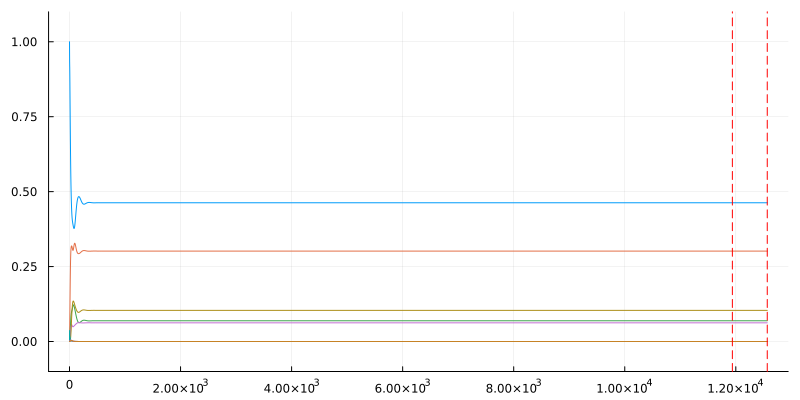

In [330]:
using Plots
plot_us = sol.u#[1:10:end]
plot_ts = sol.t#[1:10:end]

n_states = size(p.ρ_soa, 1)
plot(size=(800, 400), ylim=(-0.1, 1.1), legend=nothing)
for i in 1:n_states
    state_idx = n_states*(i-1) + i
    plot!(plot_ts, [real(u[state_idx]) for u in plot_us])
end
plot!()
offset = 0
vline!([sol.t[end] - prob.p.period - offset, sol.t[end] - offset], color="red", linestyle=:dash)

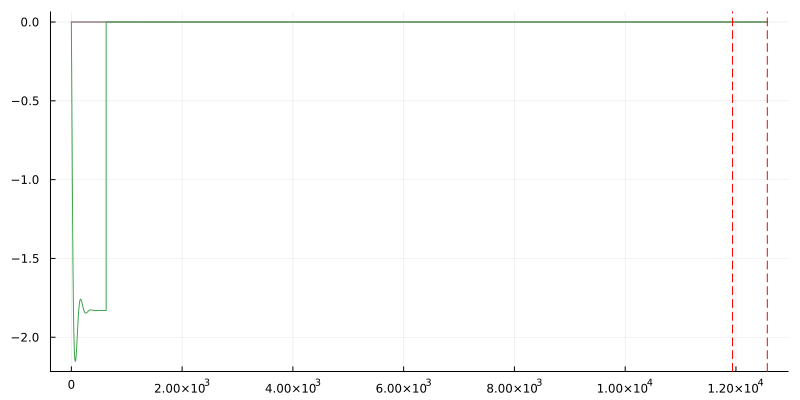

In [331]:
plot(size=(800, 400), legend=nothing)
plot!(plot_ts, 1e3 .* [real(u[end-2]) for u in plot_us] ./ prob.p.period)
plot!(plot_ts, 1e3 .* [real(u[end-1]) for u in plot_us] ./ prob.p.period)
plot!(plot_ts, 1e3 .* [real(u[end]) for u in plot_us] ./ prob.p.period)
plot!()
offset = 0
vline!([sol.t[end] - prob.p.period - offset, sol.t[end] - offset], color="red", linestyle=:dash)

In [332]:
prob.p.populations

8-element Vector{ComplexF64}:
   0.46292031775472936 + 0.0im
   0.30169838447273034 + 0.0im
   0.06912056080653856 + 0.0im
   0.06235519674049933 + 0.0im
   0.10390553615638319 + 0.0im
  9.61824414457269e-10 + 0.0im
  2.145456164568053e-9 + 0.0im
 9.618244142780095e-10 + 0.0im

In [333]:
using Distributions
uniform_dist = Uniform(0, 2π)
function sample_direction(r=1.0)
    θ = 2π * rand()
    z = rand() * 2 - 1
    return (r * sqrt(1 - z^2) * cos(θ), r * sqrt(1 - z^2) * sin(θ), r * z)
end
;

## Laser cooling force versus magnetic field

In [334]:
function prob_func!(prob, scan_params, i)
    p = prob.p
    
    # Update velocity and position
    p.particle.v .= scan_params[i].v
    p.particle.r0 .= scan_params[i].r
    
    # Update magnetic field
    H = p.extra_p.H
    H.parameters.B_z = scan_params[i].B
    evaluate!(H)
    QuantumStates.solve!(H)
    
    # Update transition dipole moments
    update_basis_tdms!(H)
    update_tdms!(H)
    new_d = H.tdms
    
    new_p = obe(p.ρ0, p.particle, H.states, p.extra_p.lasers, new_d, nothing, true, true, p.λ, p.Γ, p.freq_res, p.extra_p)
    
    return remake(prob, p=new_p)
end
function output_func(p, sol)
    f = p.force_last_period
    return f
end
;

In [335]:
using RectiGrids

freq_res = 1e-2
extra_p = (H=H, lasers=lasers)
p = obe(ρ0, particle, H.states, lasers, d, d, true, true, λ, Γ, freq_res, extra_p)

t_end = 10p.period+1; tspan = (0., t_end)
prob = ODEProblem(ρ!, p.ρ0_vec, tspan, p, reltol=1e-3, save_on=false)

Bs = (0:0.1:2.0)
di = 8
rs = vcat([(n1*λ/(di+1), n2*λ/(di+1), n3*λ/(di+1)) .* 2π for n1 ∈ 0:di, n2 ∈ 0:di, n3 ∈ 0:di]...)
vs = [sample_direction(0.0) for _ in 1:1]

scan_values = (B = Bs, r = rs, v = vs)
scan_values_grid = RectiGrids.grid(scan_values)
;

In [336]:
@time forces, populations = force_scan_v2(prob, scan_values_grid, prob_func!, output_func);

Progress: 100%|█████████████████████████████████████████| Time: 0:02:04m

124.365416 seconds (10.54 M allocations: 1.556 GiB, 39.02% compilation time)


In [337]:
averaged_forces = []
@time for (i,B) ∈ enumerate(Bs)
    idxs = [j for (j,x) ∈ enumerate(scan_values_grid) if x.B == B]
    push!(averaged_forces, mean([f[3] for f in forces[idxs]]))
end

  0.140910 seconds (78.18 k allocations: 6.036 MiB, 97.54% compilation time)


In [338]:
λ_ = 626e-9
Γ_ = 2π * 6.4e6
m_ = @with_unit 57 "u"
k_ = 2π / λ_

1.0037037231916271e7

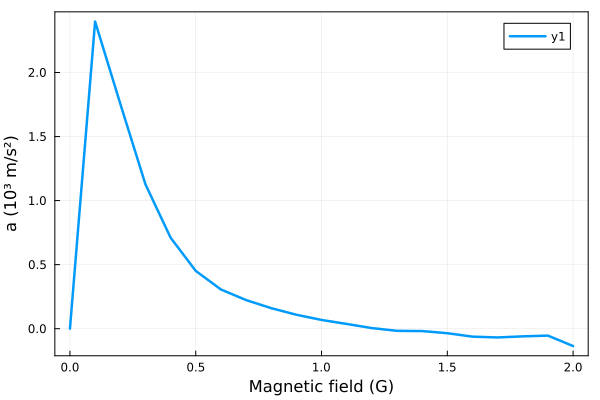

In [339]:
plot(Bs, 1e-3 .* averaged_forces .* (ħ * k_ * Γ_ / m_),
    xlabel="Magnetic field (G)",
    ylabel="a (10³ m/s²)",
    framestyle=:box,
    linewidth=2.5,
    # labelfontsize=14,
    # tickfont=12,
    # legendfont=11,
    # ylim=(-3,23),
    # size=(600,500)
    )

In [325]:
averaged_populations = []
@time for (i,B) ∈ enumerate(Bs)
    idxs = [j for (j,x) ∈ enumerate(scan_values_grid) if x.B == B]
    push!(averaged_populations, mean([p for p in populations[idxs,:]], dims=1))
end

  0.127082 seconds (52.79 k allocations: 5.746 MiB, 97.07% compilation time)


In [326]:
averaged_populations[20]'

8×1 adjoint(::Matrix{Float64}) with eltype Float64:
 0.26296302010468703
 0.027167177444145964
 0.033078269082229265
 0.17968190988706198
 0.49225011387702017
 0.0019515997178064805
 0.001477921964065647
 0.001429987922985463

In [17]:
using
    QuantumStates,
    OpticalBlochEquations,
    DifferentialEquations,
    UnitsToValue,
    LinearAlgebra,
    Revise
;

import MutableNamedTuples: MutableNamedTuple
import StructArrays: StructArray, StructVector
import StaticArrays: @SVector
import LinearAlgebra: norm, ⋅, adjoint!, diag
import LoopVectorization: @turbo

using Parameters



function N!(dN, N, rate_eq, τ)
    @unpack H,Hv, N0, N0_vec, ω, states, fields, r, v, Γ, λ, k, freq_res, d, R, v_prev, particle, extra_p= rate_eq
    if v_prev != v
        particle.v = v
        new_rate_eq = rate_equation(N0, particle, states, fields, d, d, true, true,λ, Γ, freq_res, extra_p)
        rate_eq.H = new_rate_eq.H
        rate_eq.Hv = new_rate_eq.Hv
        rate_eq.R = new_rate_eq.R
        rate_eq.v_prev = v
    end
    n_states = length(states)
    n_fields = length(fields)
    type_complex = ComplexF64
    n_l = extra_p.n_ground
    n_u = n_states - n_l
    n_fields = length(fields)
    

    dN[:] .= 0.0
    
    # update dN

    dN[1:n_states] += H * N[1:n_states]

    
    # update integrated population
    dN[n_states+1 : end-3] = N[1:n_states]

    
    row_of_1 = StructArray(ones(type_complex, 1,n_states))

    # update force
    for p in 1:1:n_fields
    dN[end-2:end] += fields[p].k * (row_of_1 * Hv[:,:,p] * N[1:n_states])[1]
    end

    return nothing
end


function rate_equation(N0, particle, states, fields, d, d_m, should_round_freqs, alway_true, λ=1.0, Γ=2π, freq_res=1e-2, extra_p=nothing)

    period = 2π / freq_res

    n_states = length(states)
    n_fields = length(fields)

    states = StructArray(states)
    if n_fields > 0
        fields = StructArray(fields)
    end
    
    k = 2π / λ
    # particle.r0 *= 2π #(1 / k)  # `r` is in units of 1/k
    # particle.v /= (Γ / k) # velocity is in units of Γ/k
    # Convert to angular frequencies
    for i ∈ eachindex(fields)
        fields.ω[i] /= Γ
    end
    for i ∈ eachindex(states)
        states.E[i] *= 2π
        states.E[i] /= Γ
    end

    if should_round_freqs
        round_freqs!(states, fields, freq_res)
        particle.v = round_vel(particle.v, freq_res)
    end

    r0 = particle.r0
    r = particle.r
    v = particle.v
    v_prev = particle.v

    type_complex = ComplexF64


    ω = [state.E for state ∈ states]
    force_last_period = SVector(0.0, 0.0, 0.0)

    # matrix that updates populations:
    H = StructArray( zeros(type_complex, n_states, n_states) )
    n_l = extra_p.n_ground
    n_u = n_states - n_l
    n_fields = length(fields)

    # define R 
    R = StructArray(zeros(type_complex, n_l, n_u, n_fields))
    for p in 1:1:n_fields
        pol = fields[p].ϵ(0) #spherical
        # pol_cart = [(pol[1]-pol[3])/sqrt(2), (pol[1]+pol[3])/sqrt(2)*(-1im), pol[2]]
        for i in 1:1:n_l
            for j in 1:1:n_u
                ω_ij = energy(states[n_l + j]) - energy(states[i])
                ω_p = fields[p].ω
                doppler = 2π*fields[p].k ⋅ v
                f = -1 * pol[1]*d[i,n_l + j,3] + 1*pol[2]*d[i,n_l + j,2] - 1*pol[3]*d[i,n_l + j,1] 
                R[i,j,p] = 1/2 * real(f*conj(f)) * fields[p].s / (1 + 4*(ω_p - ω_ij - doppler)^2)
            end
        end
    end

    
    X = StructArray( zeros(type_complex, n_l, n_l, n_fields))
    for p in 1:1:n_fields
        for i in 1:1:n_l
            X[i,i,p] = sum(R[i,:,p])
        end
    end

    Y = StructArray(zeros(type_complex, n_u, n_u, n_fields))
    for p in 1:1:n_fields
        for j in 1:1:n_u
            Y[j,j,p] = sum(R[:,j,p])
        end
    end

    # define r (branching ratio of spontaneous decay)
    r = StructArray(zeros(type_complex, n_l, n_u))
    for i in 1:1:n_l 
        for j in 1:1:n_u 
            r[i,j] = norm(d[i,n_l + j,1])^2 + norm(d[i,n_l + j,2])^2 + norm(d[i,n_l + j,3])^2 
        end
    end

    id_l = Matrix((1.0+0im)LinearAlgebra.I, n_l, n_l)
    id_u = Matrix((1.0+0im)LinearAlgebra.I, n_u, n_u)

    H = StructArray(zeros(type_complex, n_states, n_states))
    for p in 1:1:n_fields
        H[1:n_l, 1:n_l] += -X[:,:,p]
        H[1:n_l, n_l+1:n_states] += R[:,:,p]
        H[n_l+1: n_states, 1:n_l] += transpose(R[:,:,p])
        H[n_l+1: n_states, n_l+1: n_states] += -Y[:,:,p]
    end

    
    H[1:n_l, n_l+1:n_states] += r[:,:]
    H[n_l+1:n_states, n_l+1:n_states] += -id_u

    # update matrix for force
    Hv = StructArray(zeros(type_complex, n_states, n_states, n_fields))
    for p in 1:1:n_fields
        Hv[1:n_l, n_l+1:n_states, p] = -R[:,:,p]
        Hv[n_l+1:end, 1:n_l, p] = transpose(R[:,:,p])
    end

    N0_vec=[N0; N0; 0;0;0]
    populations = N0[:];

    p = MutableNamedTuple(
        H=H, Hv=Hv, particle=particle, N0=N0, N0_vec=N0_vec, ω=ω,
        states=states, fields=fields, r0=r0, r=r, v=v, Γ=Γ, λ=λ,
        period=period, k=k, freq_res=freq_res,
        force_last_period=force_last_period, 
        d=d, 
        extra_p=extra_p, R=R, populations= populations, v_prev=v)

    return p
end



rate_equation (generic function with 5 methods)